# ⭐Imports

In [4]:
from processing_functions import *
%matplotlib inline

# ⭐ Build Classifier

## 🔵 Preprocess Data 

In [5]:
# MAIN
data_s = np.array(pd.read_csv('data/data_s_180k').iloc[:, 1:])
data_b = np.array(pd.read_csv('data/data_b_180k').iloc[:, 1:])

# Slice & Save
events_no = int(1e5)
events_no = 2000
data_s = data_s[0:events_no*40, 0:40]
data_b = data_b[0:events_no*40, 0:40]

# # Save Datasets
# pd.DataFrame(data_s).to_csv('data_s_1000')
# pd.DataFrame(data_b).to_csv('data_b_1000')

Total Events: 4000
Total Labels: 4000

Shape:  (4000, 1600)

Train:  (2788, 1600) (2788,)
Val:  (612, 1600) (612,)
Test:  (600, 1600) (600,)
 


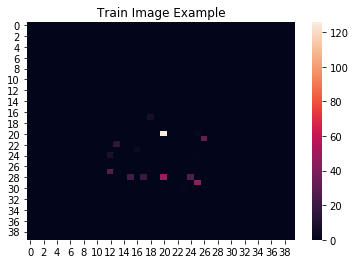

In [6]:
train_examples, train_labels, val_examples, val_labels, test_examples, test_labels = preprocess_ML_sklearn(data_s, data_b)

import sklearn.discriminant_analysis
random.seed(42)

random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
svm = SVC(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
KNN = sklearn.neighbors.KNeighborsClassifier()
naive_bayes = MultinomialNB()
BDT = sklearn.ensemble.GradientBoostingClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes_g = GaussianNB()
bagging = BaggingClassifier(random_state=42, n_jobs=-1)
SGD = sklearn.linear_model.SGDClassifier(random_state=42)
LDA = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()


models = [naive_bayes, random_forest, svm, adaboost, KNN, BDT, decision_tree, naive_bayes_g, bagging, SGD, LDA]

## 🔵 Create Models

🔴 Instantiate Models

Total No. of Training Examples: 2788




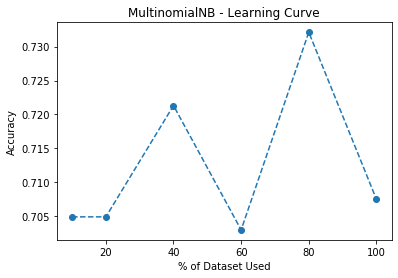

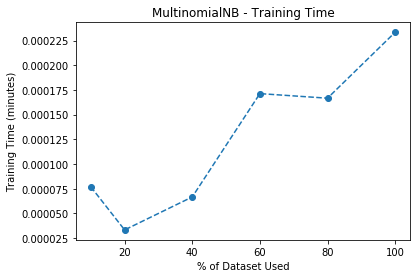

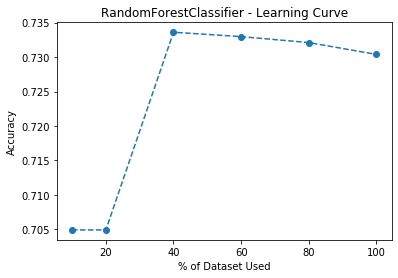

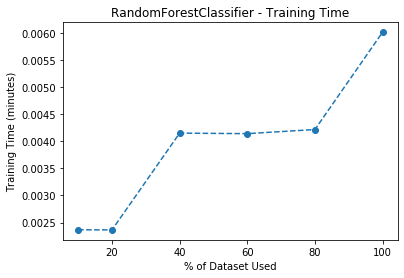

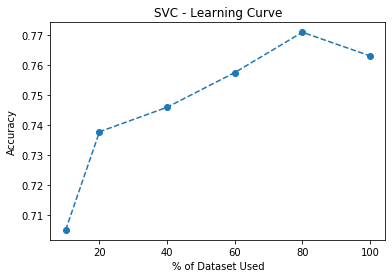

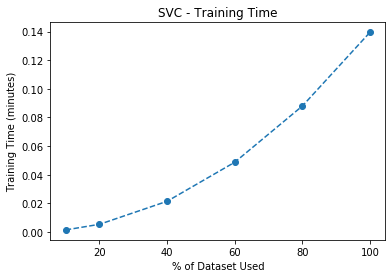

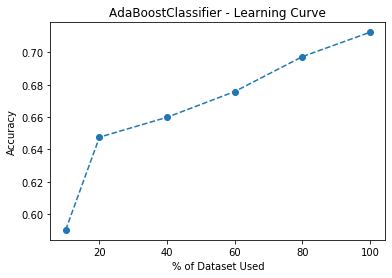

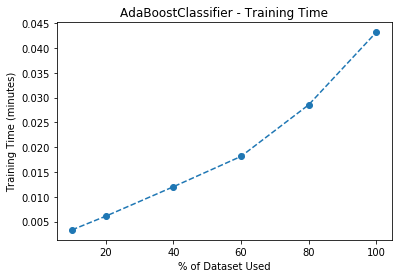

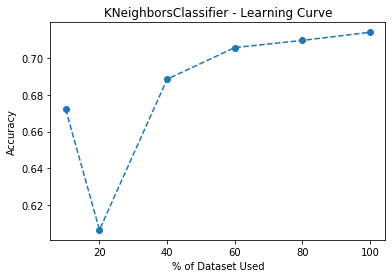

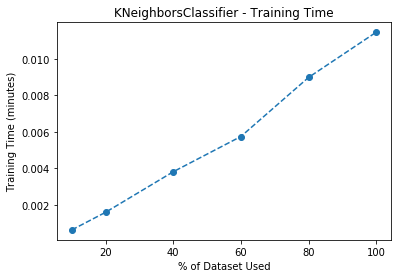

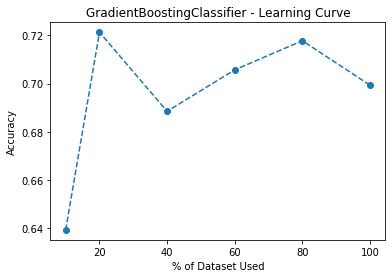

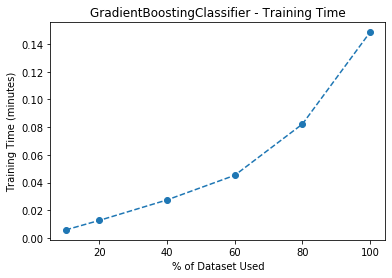

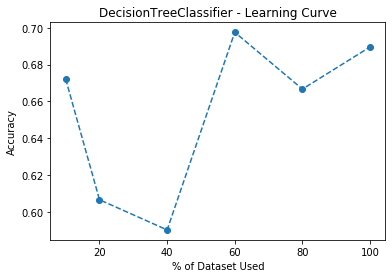

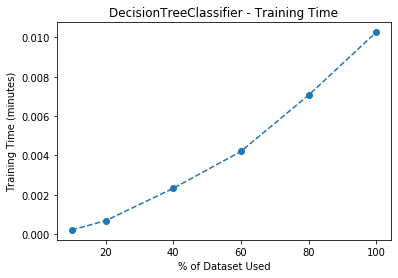

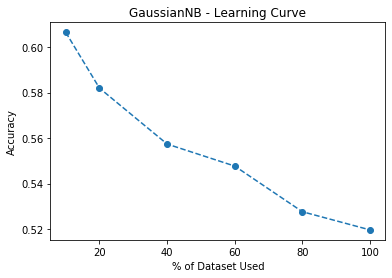

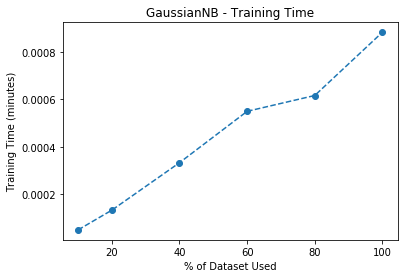

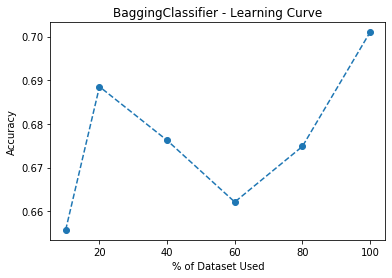

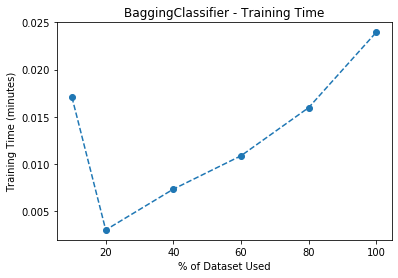

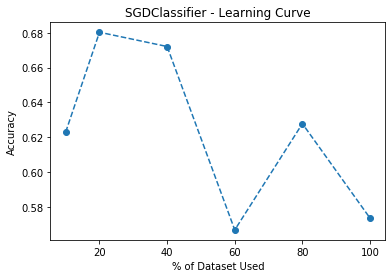

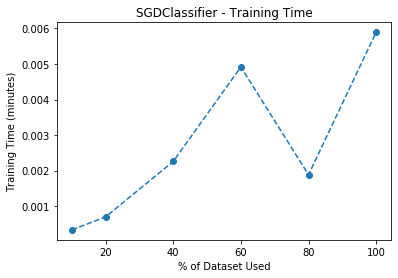

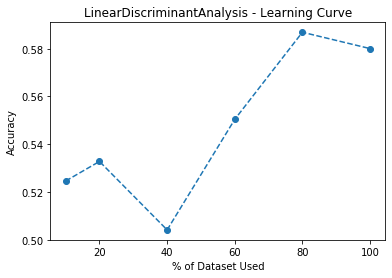

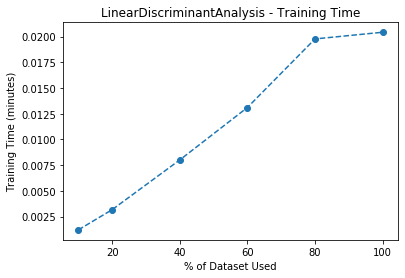

In [9]:
learning_curve_sklearn(models, train_examples, train_labels, val_examples, val_labels)

In [8]:
def learning_curve_sklearn(models, train_examples, train_labels, val_examples, val_labels):
    
    total_train = train_labels.shape[0]
    total_val = val_labels.shape[0]
    print('Total No. of Training Examples:', total_train)
    
    props = [0.1, 0.2, 0.4, 0.6, 0.8, 1]
    
    accuracies = []
    
    for model in models:
        print('\n=================================================================================================================================================================================\n')
        accuracy = []
        times = []
        
        for prop in props:
            prop_examples = int(prop*total_train)
            #print('Current No. of Training Examples:', prop_examples)
            start = time.time()
            model.fit(train_examples[0:prop_examples], train_labels[0:prop_examples])
            end = time.time()
            times.append((end-start)/60)
            #print('Training time for {} examples: {:.3f} minutes'.format(total_train, (end-start)/60))
            start = time.time()
            prop_examples_val = int(prop*total_val)
            val_preds = model.predict(val_examples[0:prop_examples_val])
            accuracy.append(accuracy_score(val_labels[0:prop_examples_val], val_preds[0:prop_examples_val]))
            end = time.time()
            #print('Prediction time for {} examples: {:.3f} minutes\n'.format(total_val, (end-start)/60))
            
            
            
        
        plt.plot(np.array(props)*100, accuracy, linestyle='--', marker='o')
        plt.xlabel('% of Dataset Used')
        plt.ylabel('Accuracy')
        plt.title('{} - Learning Curve'.format(model.__class__.__name__))
        plt.show()
        
        plt.plot(np.array(props)*100, times, linestyle='--', marker='o')
        plt.xlabel('% of Dataset Used')
        plt.ylabel('Training Time (minutes)')
        plt.title('{} - Training Time'.format(model.__class__.__name__))
        plt.show()

        
    

In [ ]:
def training_times_sklearn(models, train_examples, train_labels):
    times = 
    
    for model in models:
        start = time.time()
        model.fit(train_examples, train_labels)
        end = time.time()
        model.__class__.__name__
    
    

In [5]:
import sklearn.discriminant_analysis
random.seed(42)

random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
svm = SVC(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
KNN = sklearn.neighbors.KNeighborsClassifier()
naive_bayes = MultinomialNB()
BDT = sklearn.ensemble.GradientBoostingClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes_g = GaussianNB()
bagging = BaggingClassifier(random_state=42, n_jobs=-1)
SGD = sklearn.linear_model.SGDClassifier(random_state=42)
LDA = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()


models = [naive_bayes, random_forest, svm, adaboost, KNN, BDT, decision_tree, naive_bayes_g, bagging, SGD, LDA]

### 🔵 1. First Elimination
**Initial Algorithms**: 11 </br>
**After Elimination**: 5

**Notes**
- 100k signals and 100k backgrounds
- No hyperparameter Tuning


### 🔵 2. Second Elimination
**Initial Algorithms**: 5 </br>
**After Elimination**: 2

**Notes**
- 100k signals and 100k backgrounds
- With (light) Hyperparameter Tuning 


### 🔵 3. Third Elimination
**Initial Algorithms**: 5 </br>
**After Elimination**: 2

**Notes**
- 2 mill signals and 2 mill backgrounds
- With (light/heavy) Hyperparameter Tuning 


## 🔵 (Prep) Hyperparameter Tuning (Hardcore)

In [ ]:
# Naive Bayes
alpha = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

# Bagging
n_estimators_bagging = [10, 20, 30, 50, 100, 200, 300]
max_samples_bagging = [0.1, 0.2, 0.5, 1.0, 2.0, 3.0, 5.0]
max_features_bagging = [0.5, 1.0, 2.0, 3.0, 50.0, 200]

# Random Forests
criterion = ['gini', 'entropy']
n_estimators_rf = [100, 150, 200]
max_depth_rf = [None, 1, 3, 5, 10]
min_samples_leaf_rf = [5, 10]
min_samples_split_rf = [5, 10]


# SVC
kernel = ['rbf']
c_parameter = [0.0001, 0.001, 0.01, 0.1, 1, 10]
gamma = [0.0001, 0.001, 0.01, 0.1, 1]


# AdaBoost
n_estimators_ada = [10, 30, 50, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]


# Hyperparameters
naive_bayes_parameters = {'alpha': alpha}
naive_bayes_g_parameters = {'var_smoothing': np.logspace(0,-9, num=1000)}
bagging_parameters = {'n_estimators': n_estimators_bagging, 'max_features': max_features_bagging, 'max_samples': max_samples_bagging}
random_forest_parameters = {'n_estimators': n_estimators_rf, 'max_depth': max_depth_rf, 'min_samples_leaf': min_samples_leaf_rf, 'min_samples_split': min_samples_split_rf}
svm_parameters = {'kernel': kernel, 'C': c_parameter, 'gamma': gamma}
adaboost_parameters = {'n_estimators': n_estimators_ada, 'learning_rate': learning_rate}

# Scoring object using accuracy
scorer = make_scorer(accuracy_score)


clfs_param =[(naive_bayes, naive_bayes_parameters), 
             (naive_bayes_g, naive_bayes_g_parameters), 
             (bagging, bagging_parameters), 
             (random_forest, random_forest_parameters), 
             (svm, svm_parameters), 
             (adaboost, adaboost_parameters)]

## 🔵 (Prep) Hyperparameter Tuning (Softcore)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from time import time


# Naive Bayes
alpha = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

# Bagging
n_estimators_bagging = [300, 1]
max_samples_bagging = [1.0]
max_features_bagging = [0.5]

# Random Forests
criterion = ['gini']
n_estimators_rf = [150, 1]
max_depth_rf = [None]
min_samples_leaf_rf = [5]
min_samples_split_rf = [5]

# SVC
kernel = ['rbf']
c_parameter = [0.1, 1]
gamma = [0.01, 0.1, 1]


# AdaBoost
n_estimators_ada = [500]
learning_rate = [0.5]







# Hyperparameters
naive_bayes_parameters = {'alpha': alpha}
bagging_parameters = {'n_estimators': n_estimators_bagging, 'max_features': max_features_bagging, 'max_samples': max_samples_bagging}
random_forest_parameters = {'n_estimators': n_estimators_rf, 'max_depth': max_depth_rf, 'min_samples_leaf': min_samples_leaf_rf, 'min_samples_split': min_samples_split_rf}
svm_parameters = {'kernel': kernel, 'C': c_parameter, 'gamma': gamma}
adaboost_parameters = {'n_estimators': n_estimators_ada, 'learning_rate': learning_rate}

# Scoring object using accuracy
scorer = make_scorer(f1_score)


clfs_param =[(naive_bayes, naive_bayes_parameters), 
             (svm, svm_parameters),  
             (random_forest, random_forest_parameters), 
             (adaboost, adaboost_parameters)]

## 🔵 Hyperparameter Tuning

In [9]:
# Create list to store models
models = []
unopt_f1 = []
f1 = []

# Perform grid search
for clf, parameter in clfs_param:
    print('\n{}\n'.format(clf.__class__.__name__))
    
    grid_obj = GridSearchCV(clf, parameter, scoring=scorer, n_jobs = 6)
    
    # Perform grid search
    start = time.time()
    grid_fit = grid_obj.fit(train_examples, train_labels)
    end = time.time()
    print('Time to tune: {}s'.format(round(end - start), 2))
    
    # Get best estimator
    best_clf = grid_fit.best_estimator_
    models.append(best_clf)
    
    # Make predictions using the unoptimized and model
    start = time.time()
    predictions = (clf.fit(train_examples, train_labels)).predict(val_examples)
    best_predictions = best_clf.predict(val_examples)
    
    predictions_train = (clf.fit(train_examples, train_labels)).predict(train_examples)
    best_predictions_train = best_clf.predict(train_examples)
    end = time.time()
    print('Time to fit-predict: {}s\n'.format(round(end - start), 2))
    
    # Check hyperparameters
    print('Unoptimised: {}\n'.format(clf.get_params(deep = True)))
    print('Optimised: {}\n'.format(best_clf.get_params(deep = True)))
    
    # Print Results
    print("\nUnoptimised-f1-training: {:.4f}".format(f1_score(train_labels, predictions_train)))
    print("Optimised-f1-training: {:.4f}".format(f1_score(train_labels, best_predictions_train)))
    
    print("\nUnoptimised-f1-validation: {:.4f}".format(f1_score(val_labels, predictions)))
    print("Optimised-f1-validation: {:.4f}".format(f1_score(val_labels, best_predictions)))
    
    print('\n\n=============================================================================================')
    
    unopt_f1.append(accuracy_score(val_labels, predictions))
    f1.append(accuracy_score(val_labels, best_predictions))
    
print('All unoptimised f1 (validation): {}'.format(unopt_f1))
print('Best unoptimised f1 (validation): {}\n'.format(max(unopt_f1)))
print('All optimised f1 (validation): {}'.format(f1))
print('Best optimised f1 (validation): {}'.format(max(f1)))


MultinomialNB



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\johng\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-650e84eaa976>", line 13, in <module>
    start = time.time()
AttributeError: 'builtin_function_or_method' object has no attribute 'time'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\johng\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\johng\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1148, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\john

AttributeError: 'builtin_function_or_method' object has no attribute 'time'

## 🔵 Model Performance

In [ ]:
# Compare f1 score
compare_f1(models, test_examples, test_labels)

In [ ]:
# Plot Confusion Matrices
cmx_sklearn(models, test_examples, test_labels)

## 🔵 Bagging RF

In [ ]:
model_bagg = models[2]
model_rf = models[3]


bagg_param_final = {'base_estimator': [model_rf], 'n_estimators': [300, 500], 'max_features': [0.2, 0.3, 0.5, 0.7], 'max_samples': [1.0]}


print('\n{}\n'.format(clf.__class__.__name__))

grid_obj = GridSearchCV(model_bagg, bagg_param_final, scoring=scorer, n_jobs = 6, verbose = 5)


# Perform grid search
start = time.time()
grid_fit = grid_obj.fit(train_examples, train_labels)
end = time.time()
print('Time to tune: {}s\n'.format(round(end - start), 2))

# Get best estimator
best_clf = grid_fit.best_estimator_
models.append(best_clf)

# Make predictions using the unoptimized and model
predictions = (model_bagg.fit(train_examples, train_labels)).predict(val_examples)
best_predictions = best_clf.predict(val_examples)

predictions_train = (model_bagg.fit(train_examples, train_labels)).predict(train_examples)
best_predictions_train = best_clf.predict(train_examples)

# Check hyperparameters
print('Unoptomised: {}\n'.format(model_bagg.get_params(deep = True)))
print('Optomised: {}\n'.format(best_clf.get_params(deep = True)))

# Print Results
print("\nUnoptimised-Accuracy-Training: {:.4f}".format(accuracy_score(train_labels, predictions_train)))
print("Optimised-Accuracy-training: {:.4f}".format(accuracy_score(train_labels, best_predictions_train)))

print("\nUnoptimised-Accuracy-validation: {:.4f}".format(accuracy_score(val_labels, predictions)))
print("Optimised-Accuracy-validation: {:.4f}".format(accuracy_score(val_labels, best_predictions)))

print('\n \n \n=============================================================================================')

unopt_f1.append(accuracy_score(val_labels, predictions))
f1.append(accuracy_score(val_labels, best_predictions))